<a href="https://colab.research.google.com/github/maramatef111/Customer-Churn-Prediction/blob/main/churn_dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##**Importing Libraries**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df = pd.read_csv('churn.csv')

In [ ]:
df.head()

,Churn,AccountWeeks,ContractRenewal,DataPlan,DataUsage,CustServCalls,DayMins,DayCalls,MonthlyCharge,OverageFee,RoamMins
0,0,128,1,1,2.7,1,265.1,110,89.0,9.87,10.0
1,0,107,1,1,3.7,1,161.6,123,82.0,9.78,13.7
2,0,137,1,0,0.0,0,243.4,114,52.0,6.06,12.2
3,0,84,0,0,0.0,2,299.4,71,57.0,3.10,6.6
4,0,75,0,0,0.0,3,166.7,113,41.0,7.42,10.1


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Churn            3333 non-null   int64  
 1   AccountWeeks     3333 non-null   int64  
 2   ContractRenewal  3333 non-null   int64  
 3   DataPlan         3333 non-null   int64  
 4   DataUsage        3333 non-null   float64
 5   CustServCalls    3333 non-null   int64  
 6   DayMins          3333 non-null   float64
 7   DayCalls         3333 non-null   int64  
 8   MonthlyCharge    3333 non-null   float64
 9   OverageFee       3333 non-null   float64
 10  RoamMins         3333 non-null   float64
dtypes: float64(5), int64(6)
memory usage: 286.6 KB


In [ ]:
df.isna().sum()

,0
Churn,0
AccountWeeks,0
ContractRenewal,0
DataPlan,0
DataUsage,0
CustServCalls,0
DayMins,0
DayCalls,0
MonthlyCharge,0
OverageFee,0


In [ ]:
df.duplicated().sum()

np.int64(0)

In [ ]:
y = df['Churn']
x = df.drop('Churn', axis=1)

In [ ]:
y

,Churn
0,0
1,0
2,0
3,0
4,0
...,...
3328,0
3329,0
3330,0
3331,0


In [ ]:
x

,AccountWeeks,ContractRenewal,DataPlan,DataUsage,CustServCalls,DayMins,DayCalls,MonthlyCharge,OverageFee,RoamMins
0,128,1,1,2.70,1,265.1,110,89.0,9.87,10.0
1,107,1,1,3.70,1,161.6,123,82.0,9.78,13.7
2,137,1,0,0.00,0,243.4,114,52.0,6.06,12.2
3,84,0,0,0.00,2,299.4,71,57.0,3.10,6.6
4,75,0,0,0.00,3,166.7,113,41.0,7.42,10.1
...,...,...,...,...,...,...,...,...,...,...
3328,192,1,1,2.67,2,156.2,77,71.7,10.78,9.9
3329,68,1,0,0.34,3,231.1,57,56.4,7.67,9.6
3330,28,1,0,0.00,2,180.8,109,56.0,14.44,14.1
3331,184,0,0,0.00,2,213.8,105,50.0,7.98,5.0


In [ ]:
y.value_counts()

,count
Churn,
0,2850
1,483


##**Handling Class Imbalance with Random Oversampling**

In [ ]:
from imblearn.over_sampling import RandomOverSampler

In [ ]:
ros = RandomOverSampler()

In [ ]:
x ,y = ros.fit_resample(x,y)

In [ ]:
y.value_counts()

,count
Churn,
0,2850
1,2850


## **Splitting the Data into Training and Testing Sets**

In [ ]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=250,test_size=0.2)

##**Model 1: Logistic Regression**
In this section, we use Logistic Regression as the first model to classify transactions and detect fraud. Logistic Regression is a popular linear model for binary classification problems like fraud detection.

We will later compare its accuracy with another model to evaluate performance.

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report

In [ ]:
model = LogisticRegression()
model.fit(x_train, y_train)

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

##**Evaluating Model Accuracy First Model**

In [ ]:
y_pred = model.predict(x_test)

In [ ]:
y_pred

array([1, 0, 0, ..., 1, 1, 1])

In [ ]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.76      0.75      0.75       573
           1       0.75      0.76      0.76       567

    accuracy                           0.75      1140
   macro avg       0.75      0.75      0.75      1140
weighted avg       0.75      0.75      0.75      1140



In [ ]:
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")

Accuracy: 0.7543859649122807


Confusion Matrix (Train Set):
[[1771  506]
 [ 527 1756]]


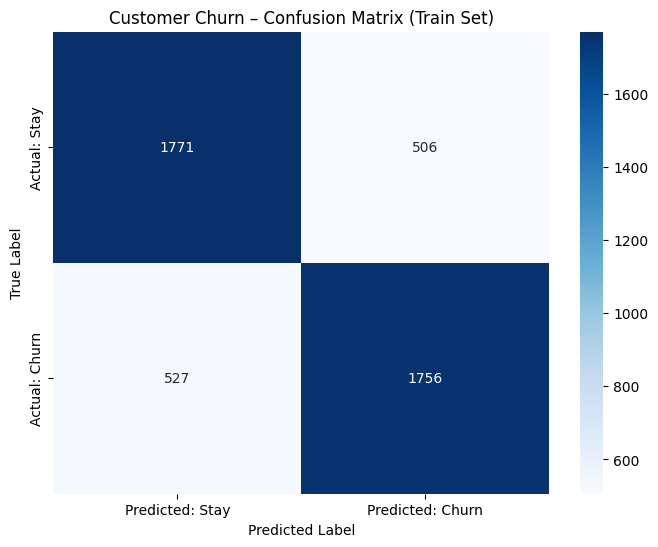


Confusion Matrix (Test Set):
[[428 145]
 [135 432]]


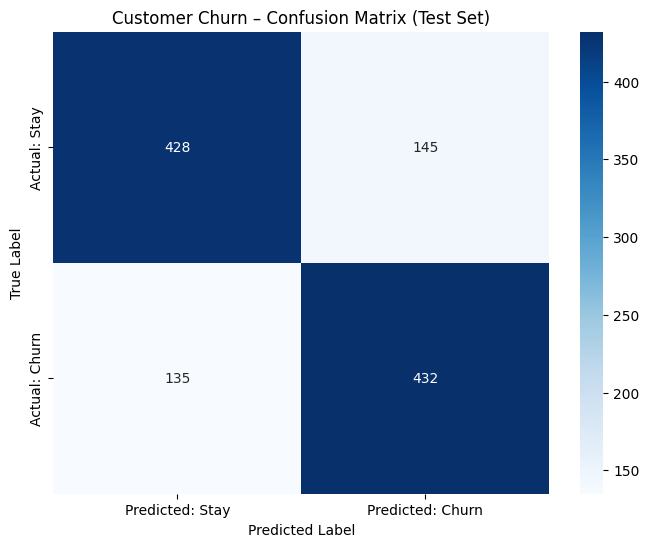

In [ ]:

from sklearn.metrics import confusion_matrix

y_train_pred = model.predict(x_train)
y_test_pred = model.predict(x_test)

cm_train = confusion_matrix(y_train, y_train_pred)
cm_test = confusion_matrix(y_test, y_test_pred)


labels = ['Predicted: Stay', 'Predicted: Churn']
true_labels = ['Actual: Stay', 'Actual: Churn']

#  Confusion Matrix for Training Set
print("Confusion Matrix (Train Set):")
print(cm_train)
plt.figure(figsize=(8, 6))
sns.heatmap(cm_train, annot=True, fmt='d', cmap='Blues',
            xticklabels=labels, yticklabels=true_labels)
plt.title('Customer Churn – Confusion Matrix (Train Set)')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

#  Confusion Matrix for Test Set
print("\nConfusion Matrix (Test Set):")
print(cm_test)
plt.figure(figsize=(8, 6))
sns.heatmap(cm_test, annot=True, fmt='d', cmap='Blues',
            xticklabels=labels, yticklabels=true_labels)
plt.title('Customer Churn – Confusion Matrix (Test Set)')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()


##**Model 2: Random Forest Classifier**
The second model used in this project is the Random Forest Classifier, a powerful ensemble method that builds multiple decision trees and merges their results to improve accuracy and control overfitting. It often performs better than simpler models like Logistic Regression in complex datasets.

In [ ]:
from sklearn.ensemble import RandomForestClassifier

In [ ]:
rfc = RandomForestClassifier()

In [ ]:
rfc.fit(x_train,y_train)

RandomForestClassifier()

##**Evaluating Model Accuracy Second Model**

In [ ]:
y_predd = rfc.predict(x_test)

In [ ]:
print(classification_report(y_test,y_predd))

              precision    recall  f1-score   support

           0       1.00      0.95      0.97       573
           1       0.95      1.00      0.98       567

    accuracy                           0.98      1140
   macro avg       0.98      0.98      0.98      1140
weighted avg       0.98      0.98      0.98      1140



Confusion Matrix (Train Set):
[[2277    0]
 [   0 2283]]


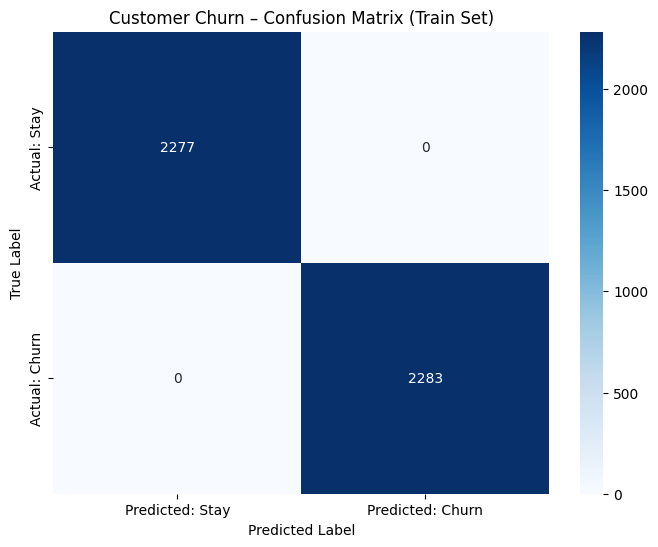


Confusion Matrix (Test Set):
[[545  28]
 [  0 567]]


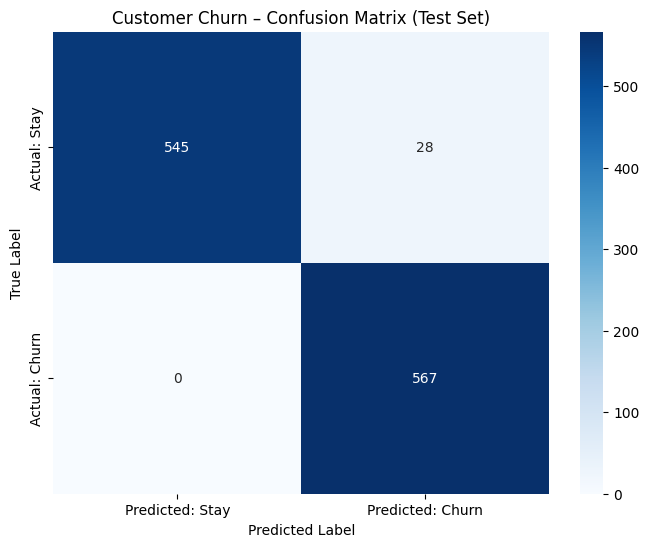

In [ ]:
from sklearn.metrics import confusion_matrix

y_train_pred =rfc.predict(x_train)
y_test_pred = rfc.predict(x_test)

cm_train = confusion_matrix(y_train, y_train_pred)
cm_test = confusion_matrix(y_test, y_test_pred)


labels = ['Predicted: Stay', 'Predicted: Churn']
true_labels = ['Actual: Stay', 'Actual: Churn']

#  Confusion Matrix for Training Set
print("Confusion Matrix (Train Set):")
print(cm_train)
plt.figure(figsize=(8, 6))
sns.heatmap(cm_train, annot=True, fmt='d', cmap='Blues',
            xticklabels=labels, yticklabels=true_labels)
plt.title('Customer Churn – Confusion Matrix (Train Set)')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

#  Confusion Matrix for Test Set
print("\nConfusion Matrix (Test Set):")
print(cm_test)
plt.figure(figsize=(8, 6))
sns.heatmap(cm_test, annot=True, fmt='d', cmap='Blues',
            xticklabels=labels, yticklabels=true_labels)
plt.title('Customer Churn – Confusion Matrix (Test Set)')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()